In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pytz
from datetime import datetime
from sklearn.model_selection import train_test_split

In [3]:
electricity_data = pd.read_csv('Data/ESB_Electric.csv', index_col='time', parse_dates=True)
electricity_data.sort_index(axis='columns', inplace=True)

electricity_data = electricity_data.asfreq('5min')

nan_rows = electricity_data.isnull().any(1)
len_total = len(electricity_data)
len_nan = nan_rows.sum()
# Remove rows with NaN values. The dataset contains some cells where values are missing.
# You can try to impute them or ignore them altogether. Which is better?
electricity_data.dropna(inplace=True)
len_valid = len(electricity_data)
# Sort by column names
electricity_data.sort_index(axis='columns', inplace=True)
print('{:10d} Total rows'.format(len_total))
print('{:10d} Rows with at least one NaN value'.format(len_nan))
print('{:10d} Rows with no NaN values'.format(len_valid))
#Convert time zones to CT
central = pytz.timezone('US/Central')
electricity_data.index = electricity_data.index.tz_convert(central)
electricity_data.head()


    105120 Total rows
     40024 Rows with at least one NaN value
     65096 Rows with no NaN values


,Humidity,PowerDemand,PowerDemand_ATS_WCN,PowerDemand_B13,PowerDemand_B27,PowerDemand_MA,PowerDemand_MB,PowerDemand_PA,PowerDemand_PB,PowerDemand_PHMA,PowerDemand_PHMB,PowerDemand_WCM_2,PowerDemand_WCM_3,Temperature
time,,,,,,,,,,,,,,
2019-01-01 00:00:00-06:00,82.151604,440.502014,65.527,202.130066,238.371933,58.959885,7.412663,120.641251,116.191360,13.0,0.000000,0.007000,0.0,56.554863
2019-01-01 00:05:00-06:00,81.462700,418.269440,65.527,208.554947,209.714478,58.500217,10.827285,102.260773,106.417732,13.0,0.000000,65.528000,0.0,56.211624
2019-01-01 00:10:00-06:00,81.229752,438.054413,65.527,215.934723,222.119690,58.285404,10.391367,105.407028,115.217628,13.0,0.000000,0.008000,0.0,56.211624
2019-01-01 00:15:00-06:00,80.934013,439.870239,65.528,212.028809,227.841431,58.668182,10.371576,109.884354,116.173973,13.0,0.000000,0.008000,0.0,56.042583
2019-01-01 00:20:00-06:00,80.934013,420.466003,65.527,205.793549,214.672470,57.754242,7.730615,98.643173,114.783913,13.0,65.530998,65.528999,0.0,56.042583


In [4]:
# Get the total power for building an ARIMA model
total_pow_pr = electricity_data['2019-03':'2019-05']['PowerDemand']

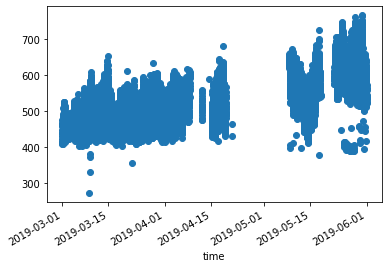

In [5]:
total_pow_pr.plot(style='o')
# electricity_data['2019-03':'2019-05'][['PowerDemand']].plot(sty='scatter')

# Inspect data for parameter selection

Start with the autocorrelation to determine number of features

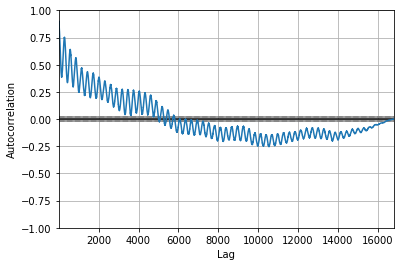

In [64]:
pd.plotting.autocorrelation_plot(total_pow_pr)

## Try an ARIMA model over one day

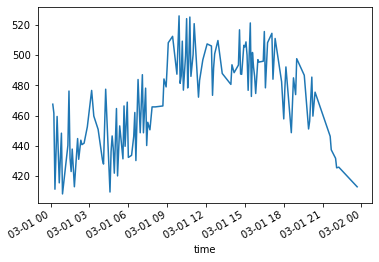

In [69]:
day1 = total_pow_pr['2019-03-01']
day1.plot()

C:\Users\Keegan\Anaconda3\envs\smartcity\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Keegan\Anaconda3\envs\smartcity\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:          D.PowerDemand   No. Observations:                  130
Model:                ARIMA(10, 1, 0)   Log Likelihood                -560.827
Method:                       css-mle   S.D. of innovations             17.988
Date:                Tue, 21 Apr 2020   AIC                           1145.654
Time:                        14:03:55   BIC                           1180.064
Sample:                             1   HQIC                          1159.636
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1712      0.494     -0.346      0.729      -1.140       0.798
ar.L1.D.PowerDemand     -0.8426      0.089     -9.461      0.000      -1.017      -0.668
ar.L2.D.Powe

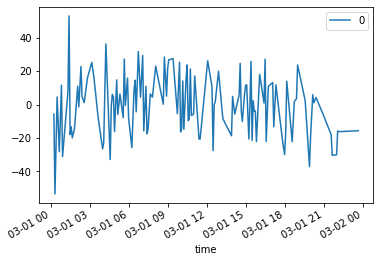

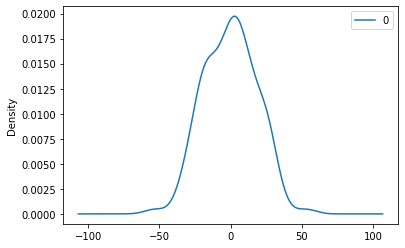

                0
count  130.000000
mean    -0.296318
std     18.245372
min    -53.569719
25%    -15.460632
50%      0.693660
75%     11.870090
max     53.209872


In [66]:
model = ARIMA(day1, order=(10,1,0))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

## Use 2 days as a training, 3rd day as testing

Implement a rolling prediction

In [181]:
from sklearn.metrics import mean_squared_error

train = total_pow_pr['2019-03-05':'2019-03-06']
test = total_pow_pr['2019-03-07']
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(10,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=437.755263, expected=436.058044
predicted=441.450189, expected=442.062073
predicted=443.370950, expected=468.108368
predicted=446.722129, expected=456.405365
predicted=444.161252, expected=414.173004
predicted=434.411815, expected=481.604553
predicted=458.371066, expected=419.539551
predicted=431.476761, expected=411.808289
predicted=439.810720, expected=410.417297
predicted=442.827787, expected=425.071533
predicted=434.130696, expected=433.586334
predicted=437.502814, expected=448.311768
predicted=436.361381, expected=453.474487
predicted=440.934610, expected=435.392426
predicted=435.213763, expected=451.110229
predicted=436.133696, expected=438.264038
predicted=436.576064, expected=451.742920
predicted=435.587182, expected=411.179657
predicted=427.451921, expected=416.135498
predicted=433.437876, expected=416.815918
predicted=435.081112, expected=436.057190
predicted=434.983387, expected=446.543213
predicted=438.382172, expected=453.153564
predicted=439.026605, expected=414

Test MSE: 352.068


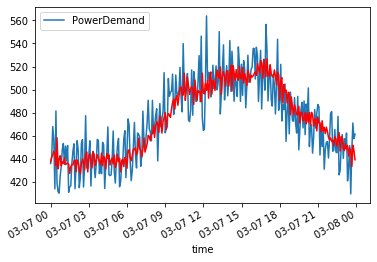

In [184]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
test.plot()
plt.plot(test.index, predictions, color='red')
plt.legend()
plt.show()

Implementation without a rolling window

In [165]:
train = total_pow_pr['2019-03':'2019-04']
test = total_pow_pr['2019-05']

model = ARIMA(train, order=(10,1,0))
model_fit = model.fit()
startdate = datetime(2019,3,7)
enddate= datetime(2019,3,8)

C:\Users\Keegan\Anaconda3\envs\smartcity\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Keegan\Anaconda3\envs\smartcity\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [166]:
predicted = model_fit.forecast(steps=50)

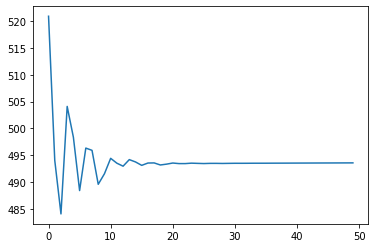

In [172]:
plt.plot(predicted[0])

The prediction does not work well for many time steps in advance. 

Trying with temperature as an exogeneous factor

In [173]:
temp_train = electricity_data['Temperature']['2019-03':'2019-04']
temp_test = electricity_data['Temperature']['2019-05']

model = ARIMA(train, order=(10,1,0), exog=temp_train)
model_fit = model.fit()
startdate = datetime(2019,3,7)
enddate= datetime(2019,3,8)

C:\Users\Keegan\Anaconda3\envs\smartcity\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Keegan\Anaconda3\envs\smartcity\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [177]:
predicted = model_fit.forecast(steps=50, exog=temp_test.iloc[:50])

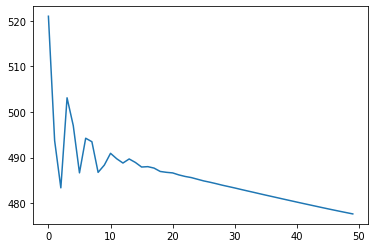

In [179]:
plt.plot(predicted[0])

# Attempt at seasonal data decomposition

In [89]:
# seasonal_data = electricity_data["2019-04-01":"2019-04-07"]['PowerDemand'].asfreq('1h')
seasonal_data = electricity_data['PowerDemand'].asfreq('1h')
seasonal_data.dropna(inplace=True)
seasonal_data = seasonal_data.values

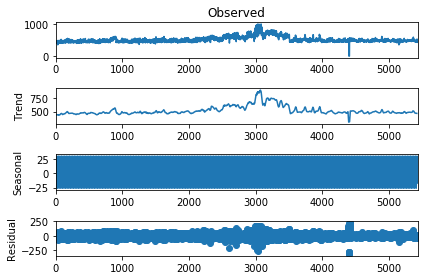

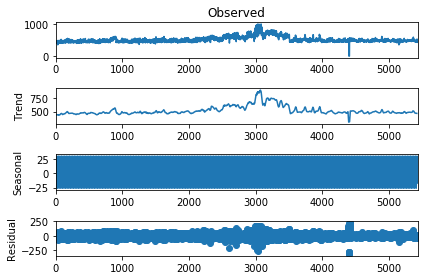

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the data based on the daily seasonality
# Period is 288 b/c there are 288 5min periods per day
result = seasonal_decompose(seasonal_data, period=24, model='additive')
result.plot()

This worked well. You can see the daily seasonality from -25 to 25 or so, with the monthly slightly increasing as it gets warmer most likely.

Choose the values for the SARIMA model. Use AIC criterion

In [86]:
from pmdarima import auto_arima
seasonal_train, seasonal_test = train_test_split(seasonal_data, test_size=0.2)


In [87]:
# stepwise_model = auto_arima(seasonal_train, seasonal=True, m=288)
stepwise_model = auto_arima(seasonal_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=24,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
#                            suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 1, 1, 24) (constant=True); AIC=1172.152, BIC=1185.563, Time=4.014 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 24) (constant=True); AIC=1276.398, BIC=1281.762, Time=0.051 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 24) (constant=True); AIC=1223.691, BIC=1234.420, Time=1.160 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 24) (constant=True); AIC=1171.572, BIC=1182.300, Time=2.323 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 24); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 24) (constant=False); AIC=1274.399, BIC=1277.081, Time=0.054 seconds
Fit ARIMA: (1, 1, 1)x(0, 1, 0, 24) (constant=True); AIC=1206.790, BIC=1217.518, Time=0.426 seconds
Fit ARIMA: (1, 1, 1)x(1, 1, 1, 24) (constant=True); AIC=1174.221, BIC=1190.314, Time=4.619 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 24); setting score to inf (at least one inverse r

C:\Users\Keegan\Anaconda3\envs\smartcity\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Keegan\Anaconda3\envs\smartcity\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Fit ARIMA: (1, 1, 1)x(0, 1, 2, 24) (constant=True); AIC=1174.043, BIC=1190.136, Time=11.201 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 2, 24); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (1, 1, 1)x(1, 1, 0, 24) (constant=True); AIC=1183.933, BIC=1197.343, Time=1.878 seconds


C:\Users\Keegan\Anaconda3\envs\smartcity\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Keegan\Anaconda3\envs\smartcity\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Fit ARIMA: (1, 1, 1)x(1, 1, 2, 24) (constant=True); AIC=1176.041, BIC=1194.816, Time=10.379 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 2, 24); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA: (1, 1, 0)x(0, 1, 1, 24) (constant=True); AIC=1213.907, BIC=1224.636, Time=2.216 seconds
Near non-invertible roots for order (1, 1, 0)(0, 1, 1, 24); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (2, 1, 1)x(0, 1, 1, 24) (constant=True); AIC=1173.941, BIC=1190.034, Time=5.457 seconds
Near non-invertible roots for order (2, 1, 1)(0, 1, 1, 24); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (1, 1, 2)x(0, 1, 1, 24) (constant=True); AIC=1175.543, BIC=1191.636, Time=4.670 seconds
Near non-invertible roots for order (1, 1, 2)(0, 1, 1, 24); setting score to inf (at least one inverse root too close to the b

C:\Users\Keegan\Anaconda3\envs\smartcity\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Fit ARIMA: (0, 1, 2)x(0, 1, 1, 24) (constant=True); AIC=1172.046, BIC=1185.456, Time=4.308 seconds
Near non-invertible roots for order (0, 1, 2)(0, 1, 1, 24); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (2, 1, 0)x(0, 1, 1, 24) (constant=True); AIC=1197.408, BIC=1210.818, Time=3.663 seconds
Near non-invertible roots for order (2, 1, 0)(0, 1, 1, 24); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (2, 1, 2)x(0, 1, 1, 24) (constant=True); AIC=1175.384, BIC=1194.159, Time=5.209 seconds
Near non-invertible roots for order (2, 1, 2)(0, 1, 1, 24); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 62.474 seconds


In [88]:
model.fit(seasonal_train)

C:\Users\Keegan\Anaconda3\envs\smartcity\lib\site-packages\statsmodels\tsa\statespace\tools.py:502: RuntimeWarning: invalid value encountered in sqrt
  x = r / ((1 - r**2)**0.5)


LinAlgError: Schur decomposition solver error.

In [37]:
forecast = model.predict(n_periods=len(seasonal_test))

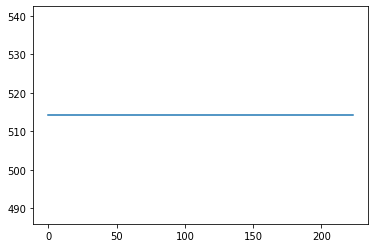

In [38]:
plt.plot(forecast)

In [78]:
len(seasonal_data)

335